Background: Company X had created an app with energy report dashboard, energy breakdown etc for the domestic utility industry. Utility company Y had given it a trial among its customer base for a duration of 9months. The app has 10 screens: Activate, Breakdown, Challenge, Energy_History, Energy_Reports, Feed, Forgot_password, Other, Settings, Trend.

Data: Each month there are different cohort of customer signed up for the app. We have a monthly app usage time by screens for each consumerID. (ie. consumer A accessed and stayed on 'Activation' screen for 3seconds, 'Energy Report' screen for 1minute etc.) There are 5286 uniqe customer ID * 10 columns screen usage time for each month (for 9 months) in the raw data. Albeit the users started using the app at different starting month.

Problem: We would like to find out if we can build a model predicting an user will be active or inactive based on previous month screen usage breakdown.


In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [77]:


def df_format(df):
    '''
    Formatting the data: 1) set ID as index column, drop blanks, column naming convention
    2) define active usage of the app: if an user accessed any screen more than 3 seconds on given any month (other than 
    Setting, forgetting passwords or activation page)

    '''
    df.rename(columns={ df.columns[0]: "ID" }, inplace=True)
    df.set_index('ID',inplace=True)
    df.columns=df.columns.str.replace(" ","_")
    df[df.select_dtypes(include=['number']).columns] *= (24*60)
    try:
        df['total-pw-setting']=(df['Grand_Total']-df['Forgot_password']-df['Settings']-df['Activate'])
        df['Target']=df['total-pw-setting'].apply(lambda x: 0 if x<3 else 1)
        df.drop(['(blank)','Grand_Total'], axis=1, inplace=True)
    except KeyError:
        return 
    

In [15]:

#Extract Data 

May18=pd.read_excel('May18.xlsx')
Jun18=pd.read_excel('Jun18.xlsx')
Jul18=pd.read_excel('Jul18.xlsx')
Aug18=pd.read_excel('Aug18.xlsx')
Sep18=pd.read_excel('Sep18.xlsx')
Oct18=pd.read_excel('Oct18.xlsx')
Nov18=pd.read_excel('Nov18.xlsx')
Dec18=pd.read_excel('Dec18.xlsx')
Jan19=pd.read_excel('Jan19.xlsx')
Feb19=pd.read_excel('Feb19.xlsx')
Mar19=pd.read_excel('Mar19.xlsx')



In [16]:
May18.describe()

,Activate,Breakdown,Challenge,Energy History,Energy Reports,Feed,Forgot password,Other,Settings,Trend,(blank),Grand Total
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.0,491.000000
mean,0.000017,0.000681,0.000178,0.001194,0.000770,0.000444,0.000041,0.000026,0.001120,0.001192,0.0,0.005662
std,0.000091,0.001370,0.000598,0.002506,0.001464,0.000648,0.000174,0.000144,0.001659,0.002730,0.0,0.007423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000069,0.0,0.001122
50%,0.000000,0.000156,0.000000,0.000283,0.000301,0.000254,0.000000,0.000000,0.000217,0.000355,0.0,0.003459
75%,0.000000,0.000702,0.000113,0.001225,0.000906,0.000624,0.000000,0.000000,0.001928,0.001030,0.0,0.007099
max,0.001200,0.011771,0.008384,0.025933,0.016124,0.005866,0.002003,0.001777,0.009308,0.027479,0.0,0.057409


Re-format

In [17]:

df_format(May18)
df_format(Jun18)
df_format(Jul18)
df_format(Aug18)
df_format(Sep18)
df_format(Oct18)
df_format(Nov18)
df_format(Dec18)
df_format(Jan19)
df_format(Feb19)
df_format(Mar19)


In [18]:
May18.describe()

,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend,total-pw-setting,Target
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.024967,0.981199,0.256289,1.719028,1.108702,0.639526,0.058336,0.036842,1.612881,1.715928,6.457513,0.484725
std,0.131005,1.972921,0.860522,3.609056,2.108185,0.932689,0.250584,0.207869,2.388561,3.930851,9.744339,0.500276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.004800,0.000000,0.000000,0.000000,0.098917,1.075225,0.000000
50%,0.000000,0.225150,0.000000,0.407750,0.433117,0.365917,0.000000,0.000000,0.312950,0.511433,2.846783,0.000000
75%,0.000000,1.010400,0.163258,1.764617,1.304875,0.897900,0.000000,0.000000,2.776033,1.483225,7.562450,1.000000
max,1.727317,16.950950,12.073300,37.342950,23.217867,8.447083,2.883783,2.559183,13.404100,39.569517,74.173183,1.000000


Merge data: combining app usage time from Month T and target outcome of active/inactive in month T+1.

In [19]:
df_target_Jun18=pd.merge(May18.iloc[:,0:11],Jun18.Target,left_index=True, right_index=True, how="left")
df_target_Jul18=pd.merge(Jun18.iloc[:,0:11],Jul18.Target,left_index=True, right_index=True, how="left")
df_target_Aug18=pd.merge(Jul18.iloc[:,0:11],Aug18.Target,left_index=True, right_index=True, how="left")
df_target_Sep18=pd.merge(Aug18.iloc[:,0:11],Sep18.Target,left_index=True, right_index=True, how="left")
df_target_Oct18=pd.merge(Sep18.iloc[:,0:11],Oct18.Target,left_index=True, right_index=True, how="left")
df_target_Nov18=pd.merge(Oct18.iloc[:,0:11],Nov18.Target,left_index=True, right_index=True, how="left")
df_target_Dec18=pd.merge(Nov18.iloc[:,0:11],Dec18.Target,left_index=True, right_index=True, how="left")
df_target_Jan19=pd.merge(Dec18.iloc[:,0:11],Jan19.Target,left_index=True, right_index=True, how="left")
df_target_Feb19=pd.merge(Jan19.iloc[:,0:11],Feb19.Target,left_index=True, right_index=True, how="left")
df_target_Mar19=pd.merge(Feb19.iloc[:,0:11],Mar19.Target,left_index=True, right_index=True, how="left")

df_comb=pd.DataFrame()
df_comb=pd.concat([df_target_Jun18,
                   df_target_Jul18,
                   df_target_Aug18,
                   df_target_Sep18,
                   df_target_Jun18,
                   df_target_Jul18,
                   df_target_Aug18,
                   df_target_Sep18,
                   df_target_Oct18,
                   df_target_Nov18,
                   df_target_Dec18,
                   df_target_Jan19,
                   df_target_Feb19,
                   df_target_Mar19
                  ], sort=False)
df_comb.Target.fillna(0, inplace=True)
df_comb.describe()

,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend,total-pw-setting,Target,Right_Now,Grand_Total
count,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,982.000000,21864.000000,2216.000000,18666.000000
mean,0.001121,1.200974,0.229744,1.794978,1.178358,1.025101,0.002620,0.141309,1.341226,1.905681,6.457513,0.268798,0.000060,9.602953
std,0.028214,27.065985,4.588918,39.875377,27.764501,27.622096,0.054412,0.691615,19.561587,41.936254,9.739372,0.443345,0.002012,201.905110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.001450,0.000000,0.000000,0.000000,0.000000,1.071254,0.000000,0.000000,0.918212
50%,0.000000,0.144933,0.000000,0.163792,0.142800,0.360567,0.000000,0.000000,0.068542,0.192958,2.846783,0.000000,0.000000,3.445733
75%,0.000000,0.949567,0.000000,1.185604,0.961742,0.914146,0.000000,0.000000,1.361312,1.095975,7.577050,1.000000,0.000000,8.192583
max,1.727317,2933.794167,530.075400,4256.898483,3047.709000,2832.671050,2.883783,18.245583,2485.562317,4608.315900,74.173183,1.000000,0.067000,20713.271900


In [20]:
df_comb.head()

,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend,total-pw-setting,Target,Right_Now,Grand_Total
ID,,,,,,,,,,,,,,
ABDHFCJIDCF,0.0,0.000000,0.000000,0.000000,0.000000,0.770250,0.0000,0.691683,10.692783,0.857233,2.319167,1.0,NaN,NaN
ABDHGHGIDGD,0.0,2.173883,0.000000,0.185200,2.342733,1.650767,0.0000,0.000000,0.000000,1.576650,7.929233,1.0,NaN,NaN
ABEGFGFCCAI,0.0,5.532900,1.020917,16.544500,4.483817,4.754350,0.7303,0.000000,4.336717,1.968683,34.305167,0.0,NaN,NaN
ABEMGELDDIC,0.0,3.401117,0.303483,0.866283,2.902100,2.243750,0.0000,0.000000,12.313850,8.189450,17.906183,1.0,NaN,NaN
ABFHFIJJEGC,0.0,3.716900,1.021683,2.196500,7.875067,3.144817,0.0000,0.000000,6.252467,2.053500,20.008467,1.0,NaN,NaN


In [21]:
df_comb.drop(['Right_Now','Grand_Total'],axis=1,inplace=True)
df_comb.head()

,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend,total-pw-setting,Target
ID,,,,,,,,,,,,
ABDHFCJIDCF,0.0,0.000000,0.000000,0.000000,0.000000,0.770250,0.0000,0.691683,10.692783,0.857233,2.319167,1.0
ABDHGHGIDGD,0.0,2.173883,0.000000,0.185200,2.342733,1.650767,0.0000,0.000000,0.000000,1.576650,7.929233,1.0
ABEGFGFCCAI,0.0,5.532900,1.020917,16.544500,4.483817,4.754350,0.7303,0.000000,4.336717,1.968683,34.305167,0.0
ABEMGELDDIC,0.0,3.401117,0.303483,0.866283,2.902100,2.243750,0.0000,0.000000,12.313850,8.189450,17.906183,1.0
ABFHFIJJEGC,0.0,3.716900,1.021683,2.196500,7.875067,3.144817,0.0000,0.000000,6.252467,2.053500,20.008467,1.0


Start to understand the Data & filtering

In [22]:
df_comb.describe()

,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend,total-pw-setting,Target
count,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,982.000000,21864.000000
mean,0.001121,1.200974,0.229744,1.794978,1.178358,1.025101,0.002620,0.141309,1.341226,1.905681,6.457513,0.268798
std,0.028214,27.065985,4.588918,39.875377,27.764501,27.622096,0.054412,0.691615,19.561587,41.936254,9.739372,0.443345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.001450,0.000000,0.000000,0.000000,0.000000,1.071254,0.000000
50%,0.000000,0.144933,0.000000,0.163792,0.142800,0.360567,0.000000,0.000000,0.068542,0.192958,2.846783,0.000000
75%,0.000000,0.949567,0.000000,1.185604,0.961742,0.914146,0.000000,0.000000,1.361312,1.095975,7.577050,1.000000
max,1.727317,2933.794167,530.075400,4256.898483,3047.709000,2832.671050,2.883783,18.245583,2485.562317,4608.315900,74.173183,1.000000


There are clearly outliers in the dataset by looking at Max vs 50% and mean. Let's get rid off all data that's greater than 500.

In [23]:
#the box chart suggests that there are outliars need to be treated. set filter to less than 500s per screen.
df_comb=df_comb[df_comb['Energy_History']<500]
df_comb.describe()

,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend,total-pw-setting,Target
count,21860.000000,21860.000000,21860.000000,21860.000000,21860.000000,21860.000000,21860.000000,21860.000000,21860.000000,21860.000000,982.000000,21860.000000
mean,0.001122,0.861229,0.174169,1.286183,0.831151,0.683270,0.002621,0.139522,1.132500,1.395157,6.457513,0.268664
std,0.028217,1.884131,0.728474,3.374971,1.735021,1.028121,0.054417,0.670999,3.980058,7.163078,9.739372,0.443275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.001446,0.000000,0.000000,0.000000,0.000000,1.071254,0.000000
50%,0.000000,0.144817,0.000000,0.163475,0.142642,0.360450,0.000000,0.000000,0.068517,0.192783,2.846783,0.000000
75%,0.000000,0.948925,0.000000,1.184925,0.961092,0.913750,0.000000,0.000000,1.360208,1.095042,7.577050,1.000000
max,1.727317,54.176550,20.007183,105.785017,35.571283,15.695217,2.883783,17.824600,336.753183,524.651983,74.173183,1.000000


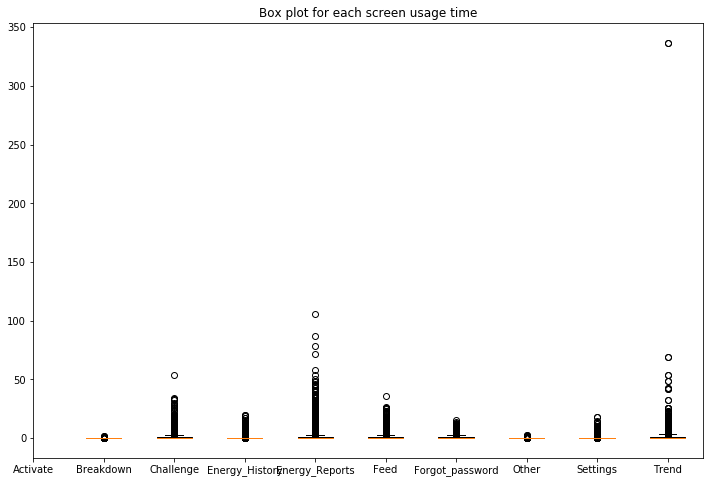

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.boxplot([df_comb[col] for col in df_comb.columns[:-3]])
plt.title("Box plot for each screen usage time")
plt.xticks(range(len(df_comb.columns[:-2].values)), df_comb.columns[:-2].values)
plt.show()

The most valuablable screen for this app is Energy Reports and Trend. The company should not be spending time on refining breakdown page.

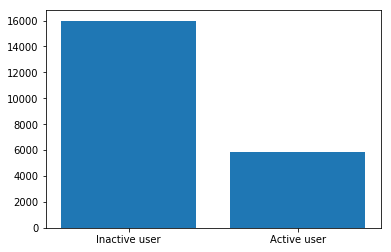

Zeros/Inactive:  0.7313357731015554
Ones/Active:  0.26866422689844466


In [13]:
import numpy as np
ones=df_comb.Target.sum()
zeros=len(df_comb.Target)-ones
height=[zeros,ones]
bars=("Inactive user", "Active user")
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos,bars)
plt.show()

print('Zeros/Inactive: ', zeros/(zeros+ones))
print('Ones/Active: ', ones/(zeros+ones))


Baseline data is skewed to Inactive/zeros. Need to resample and use balanced dataset.

Start splitting training and testing dataset.

In [31]:
X = df_comb[df_comb.columns]
y = df_comb.Target
x_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)
x_train.head()

,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend,total-pw-setting,Target
ID,,,,,,,,,,,,
BILDLCEJEHC,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,0.0
ABEELDFGCHJ,0.0,0.750317,6.973733,14.084967,4.648450,0.848567,0.0,0.0,2.445450,5.261817,NaN,1.0
AJIDEFIHECC,0.0,0.211833,0.000000,0.540333,0.063967,1.599267,0.0,0.0,0.246967,0.796017,NaN,0.0
ADKFFJIIFAG,0.0,0.202333,0.000000,0.015400,0.888567,0.046517,0.0,0.0,3.343967,0.177867,NaN,0.0
ABGLELFIEHJ,0.0,0.000000,0.000000,0.347550,1.374433,0.000000,0.0,0.0,0.000000,2.021400,3.743383,0.0


Create a balanced dataset for training.

In [35]:

X_balance = pd.concat([x_train[x_train.Target==0].sample(len(x_train[x_train['Target'] == 1])), 
                 x_train[x_train['Target'] == 1]])
y_train=X_balance.Target
X_train=X_balance[X_balance.columns[:-2]]
X_test=X_test[X_test.columns[:-2]]
X_train.head()


,Activate,Breakdown,Challenge,Energy_History,Energy_Reports,Feed,Forgot_password,Other,Settings,Trend
ID,,,,,,,,,,
BHFLHHKHFHB,0.0,0.000000,0.000000,0.000000,0.000000,0.337500,0.0,0.0,0.329100,0.00000
BFGGJCGDDAH,0.0,0.537500,0.000000,1.350233,0.254550,0.723700,0.0,0.0,1.748467,0.00000
BHFJNJLGGDI,0.0,0.000000,0.000000,0.000000,0.000000,0.551333,0.0,0.0,0.000000,0.02065
BCGMJDIFEEA,0.0,1.421800,0.000000,0.000000,0.000000,1.427383,0.0,0.0,0.150450,0.00190
BDJIHJEHEIC,0.0,0.063367,0.062933,0.842417,0.225917,0.688583,0.0,0.0,0.033583,0.21640


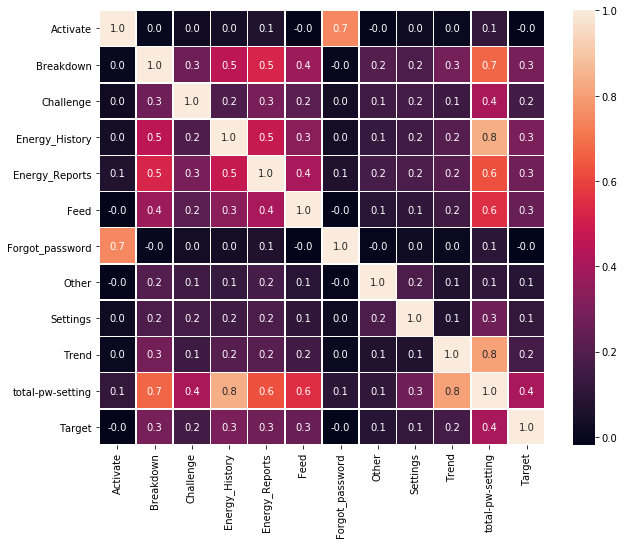

In [36]:
#correlation map
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Variables are well de-correlated, apart from 'Forget Password' and 'activation', which is expected, and Energy_history vs Total-pw-setting. This suggests that Energy History is a big proportion of the total usage time in this app.

In [37]:
#Fit a Logistic Regression Model
logreg = LogisticRegression(fit_intercept = False, C = 1e12, random_state=1) #Starter code
model_log=logreg.fit(X_train, y_train)
model_log

/Users/Alex/anaconda3/envs/stan_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#Predict
y_hat_test=logreg.predict(X_test)
y_hat_train=logreg.predict(X_train)

In [39]:
#Evaluation
res=y_train-y_hat_train
print(pd.Series(res).value_counts())
print(pd.Series(res).value_counts(normalize=True))

 0.0    5410
-1.0    3011
 1.0     433
Name: Target, dtype: int64
 0.0    0.611023
-1.0    0.340072
 1.0    0.048904
Name: Target, dtype: float64


In [28]:
model_log.score(X_test, y_test)

0.4570905763952425

In [29]:
from yellowbrick.classifier import ConfusionMatrix

/Users/Alex/anaconda3/envs/stan_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


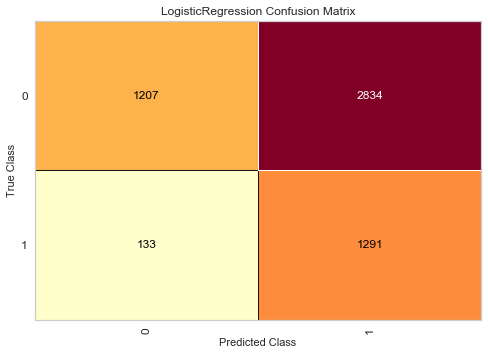

In [30]:
cm = ConfusionMatrix(model_log, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

61% time that we are correct in predicting a balanced training set. this is 10% than baseline training set of 50%

In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1270  167]
 [2749 1279]]


In [44]:
#Make Confusion Matrix Pretty
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.88378566 0.11621434]
 [0.68247269 0.31752731]]


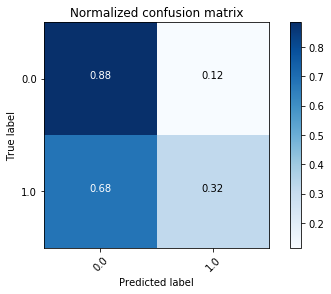

In [46]:
import numpy as np
import itertools

plt.figure()
class_names=set(y)
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The model seems better at predicting True Negative case, ie predicting that a user will be inactive next month based on previous month usage. However, it is bad (less than random chance of 50%) at predicting a usere becomes active despite inactivity over the last month. Overall accuracy is (0.76+0.48)/2=62%.

In [49]:
#ROC curve

from sklearn.metrics import roc_curve, auc,f1_score

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

AUC: 0.7428967246519558


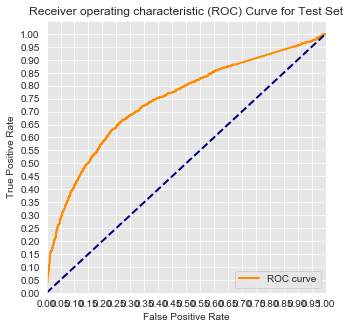

f1: 0.4660075284652993


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()
print('f1: {}'.format(f1_score(y_test, model_log.predict(X_test),average='weighted')))

In [53]:
#Try Decision Tree Model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 


In [67]:
#Default parameters
clf= DecisionTreeClassifier(random_state=1)
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)

f1: 0.7085436933450922
Accuracy is :69.36870997255261

AUC is :0.68

Confusion Matrix
----------------
Normalized confusion matrix
[[0.84989555 0.15010445]
 [0.55392621 0.44607379]]


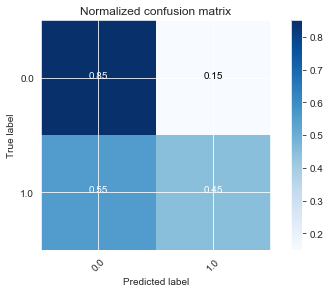

In [68]:
#Evaluating the Decision Tree Model
print('f1: {}'.format(f1_score(y_test, y_pred, average='weighted')))

acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



plt.figure()
class_names=set(y)
cnf_matrix = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize=True,
                      title='Normalized confusion matrix')

plt.show()

AUC: 0.7052471645965929


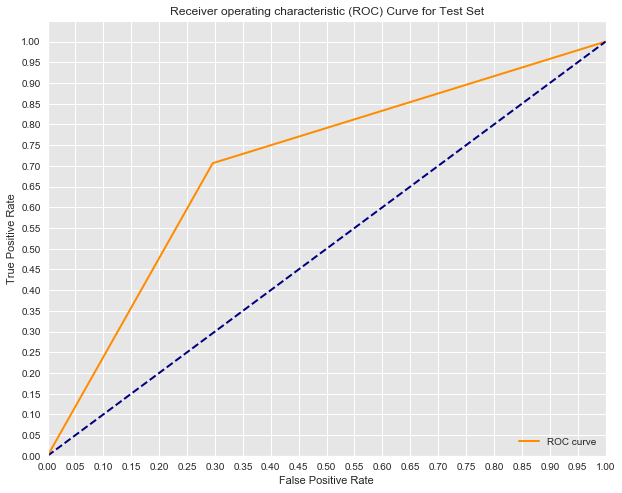

In [40]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(false_positive_rate, true_positive_rate)))
plt.show()

The AUC of 70% is worse than Logistic Regression Result.

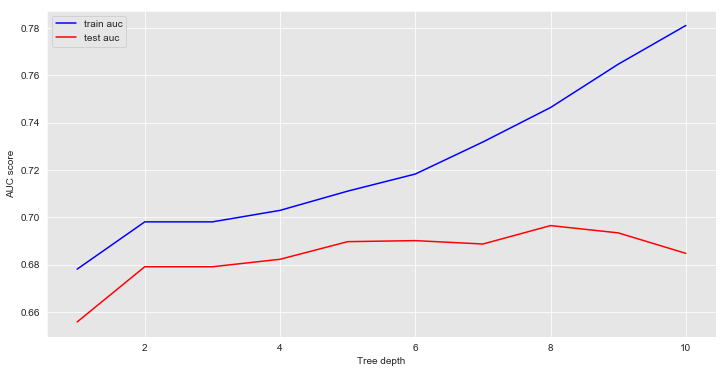

In [59]:
#Fine Tuning parameters:
# 1. Identify the optimal tree depth for given data

max_depths=np.linspace(1,10,10, endpoint=True)
train_results=[]
test_results=[]
for max_depth in max_depths:
    dt=DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred=dt.predict(X_train)
    fpr,tpr,thresholds=roc_curve(y_train, train_pred)
    roc_auc=auc(fpr, tpr)
    train_results.append(roc_auc)
    y_pred=dt.predict(X_test)
    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='train auc')
plt.plot(max_depths, test_results, 'r', label='test auc')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()



Training error decreases with increasing tree depth - sign of over fitting.
Test error is static after depth=3 - marginal improvement of less than 2% to learn from deeper trees.
Optimal value seen here is between 5 to 6.

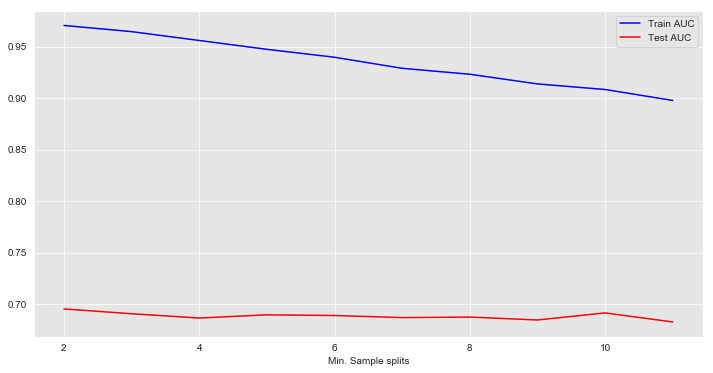

In [60]:
# Identify the optimal min-samples-split for given data

min_sample_splits=np.linspace(2, 11, 10, endpoint=True)
train_results=[]
test_results=[]
for mss in min_sample_splits:
    dt=DecisionTreeClassifier(criterion='entropy', min_samples_split=int(mss))
    dt.fit(X_train, y_train)
    train_pred=dt.predict(X_train)
    fpr, tpr, thresholds=roc_curve(y_train, train_pred)
    roc_auc=auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred=dt.predict(X_test)
    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_sample_splits, train_results, 'b', label='Train AUC')
plt.plot(min_sample_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

Best Test AUC occurs at around 2, 3 for both curves.

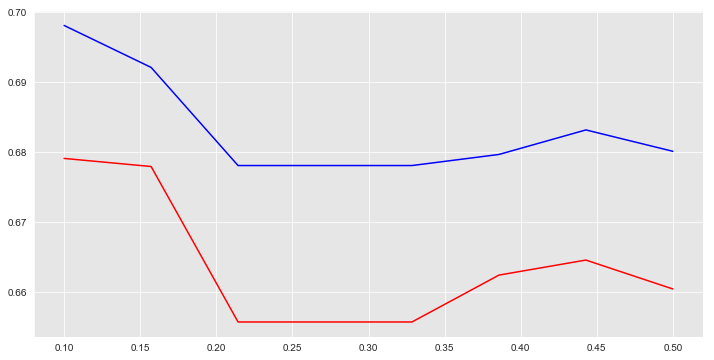

In [61]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs=np.linspace(0.1,0.5, 8, endpoint=True)
train_results=[]
test_results=[]
for msl in min_samples_leafs:
    dt=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=msl)
    dt.fit(X_train, y_train)
    train_pred=dt.predict(X_train)
    fpr, tpr, thesholds=roc_curve(y_train, train_pred)
    roc_auc=auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred=dt.predict(X_test)
    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='train auc')
plt.plot(min_samples_leafs, test_results, 'r', label='test auc')
plt.show()

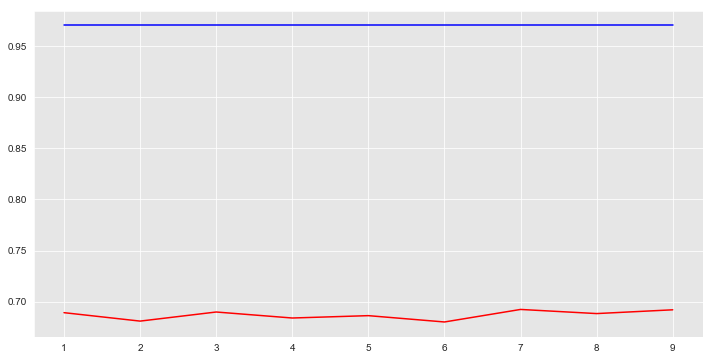

In [62]:
# Find the best value for optimal maximum feature size

max_features=list(range(1, X_train.shape[1]))
train_results=[]
test_results=[]
for max_feature in max_features:
    dt=DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred=dt.predict(X_train)
    fpr, tpr, t=roc_curve(y_train, train_pred)
    roc_auc=auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred=dt.predict(X_test)
    fpr, tpr, t=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b',label='train auc')
plt.plot(max_features, test_results, 'r', label='test auc')
plt.show() 

no clear number, fluctuating, it seems 2 and 3 are the highest point for the test AUC. 

In [63]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,6],
    'min_samples_split': [ 2,3],
    'max_features': [ 2, 3]
}

In [64]:
dt_grid_search = GridSearchCV(clf, dt_param_grid, cv=3, return_train_score=True, scoring="f1")
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'max_features': [2, 3],
      

In [65]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_train, y_train)


print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 68.29%
Mean Testing Score: 70.52%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 3,
 'min_samples_split': 2}

With the optimal parameters, we were able to improve the accuracy by 10% from 80% to 91%.

ROC is:  0.6800451141999431
f1: 0.7234367166817407
Accuracy is:  0.7127172918572735
Normalized confusion matrix
[[0.74944016 0.25055984]
 [0.38934993 0.61065007]]


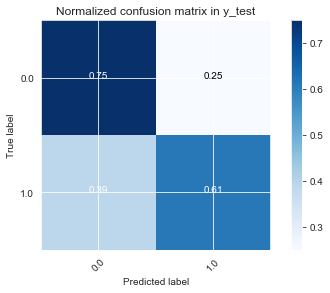

In [66]:

# train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='gini',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=2, random_state=1
                        
                           )
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
fpr, tpr, t=roc_curve(y_test, y_pred)
roc_auc=auc(fpr, tpr)
print('ROC is: ', roc_auc)

print('f1: {}'.format(f1_score(y_test, y_pred,average='weighted')))

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
class_names=set(y)
plot_confusion_matrix(cm, classes=class_names,normalize=True,
                      title='Normalized confusion matrix in y_test')

Optimized parameters performed better in predicting True Positive cases (when an user is active), performed better in F1 than the default Decision Tree parameters.

In [69]:
#Try Random Forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf_clf = RandomForestClassifier(random_state=1)


In [70]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4,5],
    'min_samples_split': [ 2,3],
    'max_features': [ 4, 5]

}
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

f1: 0.726215206970387
Testing Accuracy: 70.66%
Optimal Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 30}


ROC is:  0.6970212720559362
f1: 0.726215206970387
Accuracy is:  0.7132662397072278
Normalized confusion matrix
[[0.73152526 0.26847474]
 [0.33748271 0.66251729]]


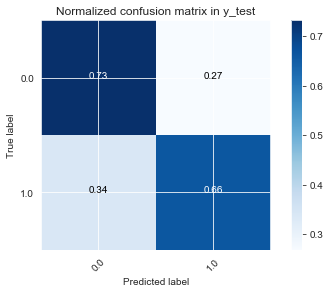

In [71]:
y_pred=rf_grid_search.predict(X_test)
fpr, tpr, t=roc_curve(y_test, y_pred)
roc_auc=auc(fpr, tpr)
print('ROC is: ', roc_auc)

print('f1: {}'.format(f1_score(y_test, rf_grid_search.predict(X_test),average='weighted')))

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
class_names=set(y)
plot_confusion_matrix(cm, classes=class_names,normalize=True,
                      title='Normalized confusion matrix in y_test')

Parameter tuning improved performance marginally, by about 2%. Compare to baseline.


/Users/Alex/anaconda3/envs/stan_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


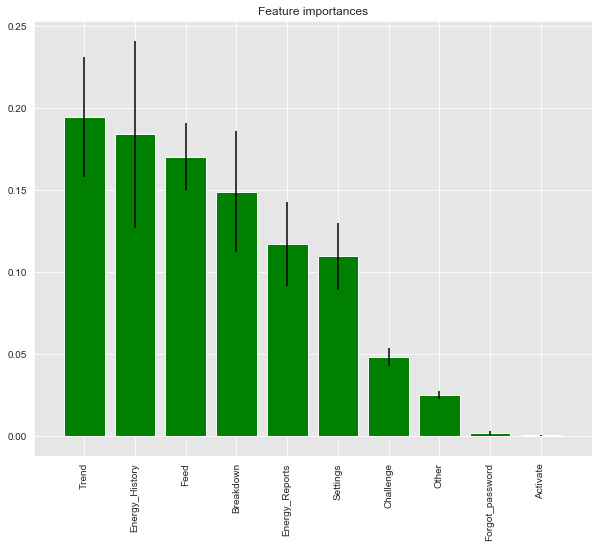

In [75]:
rf_clf.fit(X_train,y_train)
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(1, figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature importance graph also reinforced the result above on 'max feature'. The top 4 features explains 70% of the outcome.

ROC is:  0.6942716254086313
f1: 0.726215206970387
Accuracy is:  0.7297346752058554
Normalized confusion matrix
[[0.76959443 0.23040557]
 [0.38105118 0.61894882]]


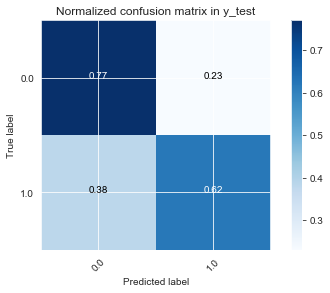

In [72]:
adaboost_clf = AdaBoostClassifier(random_state=1)
adaboost_clf.fit(X_train,y_train)

y_pred=adaboost_clf.predict(X_test)
fpr, tpr, t=roc_curve(y_test, y_pred)
roc_auc=auc(fpr, tpr)
print('ROC is: ', roc_auc)

print('f1: {}'.format(f1_score(y_test, rf_grid_search.predict(X_test),average='weighted')))

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
class_names=set(y)
plot_confusion_matrix(cm, classes=class_names,normalize=True,
                      title='Normalized confusion matrix in y_test')

Adaboost is similar to Random Forest, marginal worse on AUC.

In [73]:
df_names=[May18, Jun18,Jul18,Aug18,Sep18,Oct18,Nov18, Dec18, Jan19, Feb19, Mar19]

user=[]
user_list_may=[]
user_list_may.append(len(May18))
for idx, name in enumerate(df_names):
    
    try:
        y=pd.concat([May18,df_names[idx+1]], axis=1, join="inner")
        user_list_may.append(y.shape[0])
    except IndexError:
        continue

user_list_jun=[]
user_list_jun.append(len(Jun18))
for idx, name in enumerate(df_names):
    try:
        y=pd.concat([Jun18,df_names[idx+2]], axis=1, join="inner")
        user_list_jun.append(y.shape[0])
    except IndexError:
        continue
        
user_list_jul=[]
user_list_jul.append(len(Jul18))
for idx, name in enumerate(df_names):
    try:
        y=pd.concat([Jul18,df_names[idx+3]], axis=1, join="inner")
        user_list_jul.append(y.shape[0])
    except IndexError:
        continue
        
user_list_aug=[]
user_list_aug.append(len(Aug18))
for idx, name in enumerate(df_names):
    try:
        y=pd.concat([Aug18,df_names[idx+4]], axis=1, join="inner")
        user_list_aug.append(y.shape[0])
    except IndexError:
        continue

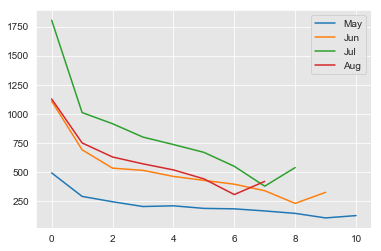

In [74]:
plt.plot(user_list_may, label='May')
plt.plot(user_list_jun, label='Jun')
plt.plot(user_list_jul, label='Jul')
plt.plot(user_list_aug, label='Aug')
plt.legend()